In [2]:
import numpy as np
import pandas as pd
import scipy 
import scipy.stats
from scipy import stats
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from itertools import groupby
import pickle
import os
import math
from sympy import S, symbols
from string import digits
from numpy import *

from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
#sns.mpl.rcParams['figure.figsize'] = (16, 10)

# Directory to store pickled dataframes
directory = '/Users/dianaow/Documents/formula-1-race-data/dataframes/'

In [3]:
sns.set_palette("Set1", 8, .75)

In [4]:
def read_from_pickle(directory, filename):
    df = pd.DataFrame()
    filepath = directory + filename
    with open(filepath, 'rb') as file:
        df = pickle.load(file)
            
    return df

In [5]:
xl = pd.ExcelFile("/Users/dianaow/Downloads/F1_Tyre_data.xlsx")
xl.sheet_names
pirelli = xl.parse("Sheet7")

In [6]:
xl = pd.ExcelFile("./formula-1-race-data/Selected_Sets.xlsx", encoding='utf-8')
xl.sheet_names
selected_sets = xl.parse("Sheet10")

In [7]:
xl = pd.ExcelFile("./formula-1-race-data/Track_Information.xlsx", encoding='utf-8')
xl.sheet_names
track_info = xl.parse("Copy of Sheet12")
# Pirelli did not release information about certain tracks in 2016 .
# They have been inputed with 2017's values

In [8]:
xl = pd.ExcelFile("./formula-1-race-data/Race_Information.xlsx", encoding='utf-8')
xl.sheet_names
track = xl.parse("Sheet12")

In [9]:
xl = pd.ExcelFile("/Users/dianaow/Downloads/F1_Tyre_data.xlsx")
xl.sheet_names
pirelli = xl.parse("Sheet7")

In [10]:
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

# create dataframe to append info too
results = pd.DataFrame(columns = ['k','silhouette','processing'])
ran = range(2,10)

def cluster(ran, data, version):
    for k in ran:
        k_means = KMeans(n_clusters=k)
        k_means.fit(data)
        labels = k_means.labels_
        score = silhouette_score(data, labels)
        results.loc[len(results)]=['c'+str(k), score, version]

In [11]:
def opt_cluster(ran, data):
    
    cluster(ran, data, 'default')

    return results.loc[results['silhouette'].idxmax()]

In [12]:
stints_15_16_17_clean = read_from_pickle(directory, "stints_15_16_17_clean.pickle")

In [13]:
stints_15_16_clean = stints_15_16_17_clean[stints_15_16_17_clean['year'].isin([2015,2016])]

In [14]:
def filter_df(df, string):
    cols = [col for col in df.columns if string in col]
    cols.append("name")
    cols.append("year")
    df_new = df.filter(cols)
    return df_new

In [15]:
l = filter_df(stints_15_16_clean, "mean")
r = filter_df(stints_15_16_clean, "range")
c = filter_df(stints_15_16_clean, "count")
lr = pd.merge(l, r, on=['name', 'year'], how='left')

## PCA Transform 2015 and 2016 dataset

#### Preprocessing Steps
#### Are the "mean" and "range" columns correlated?

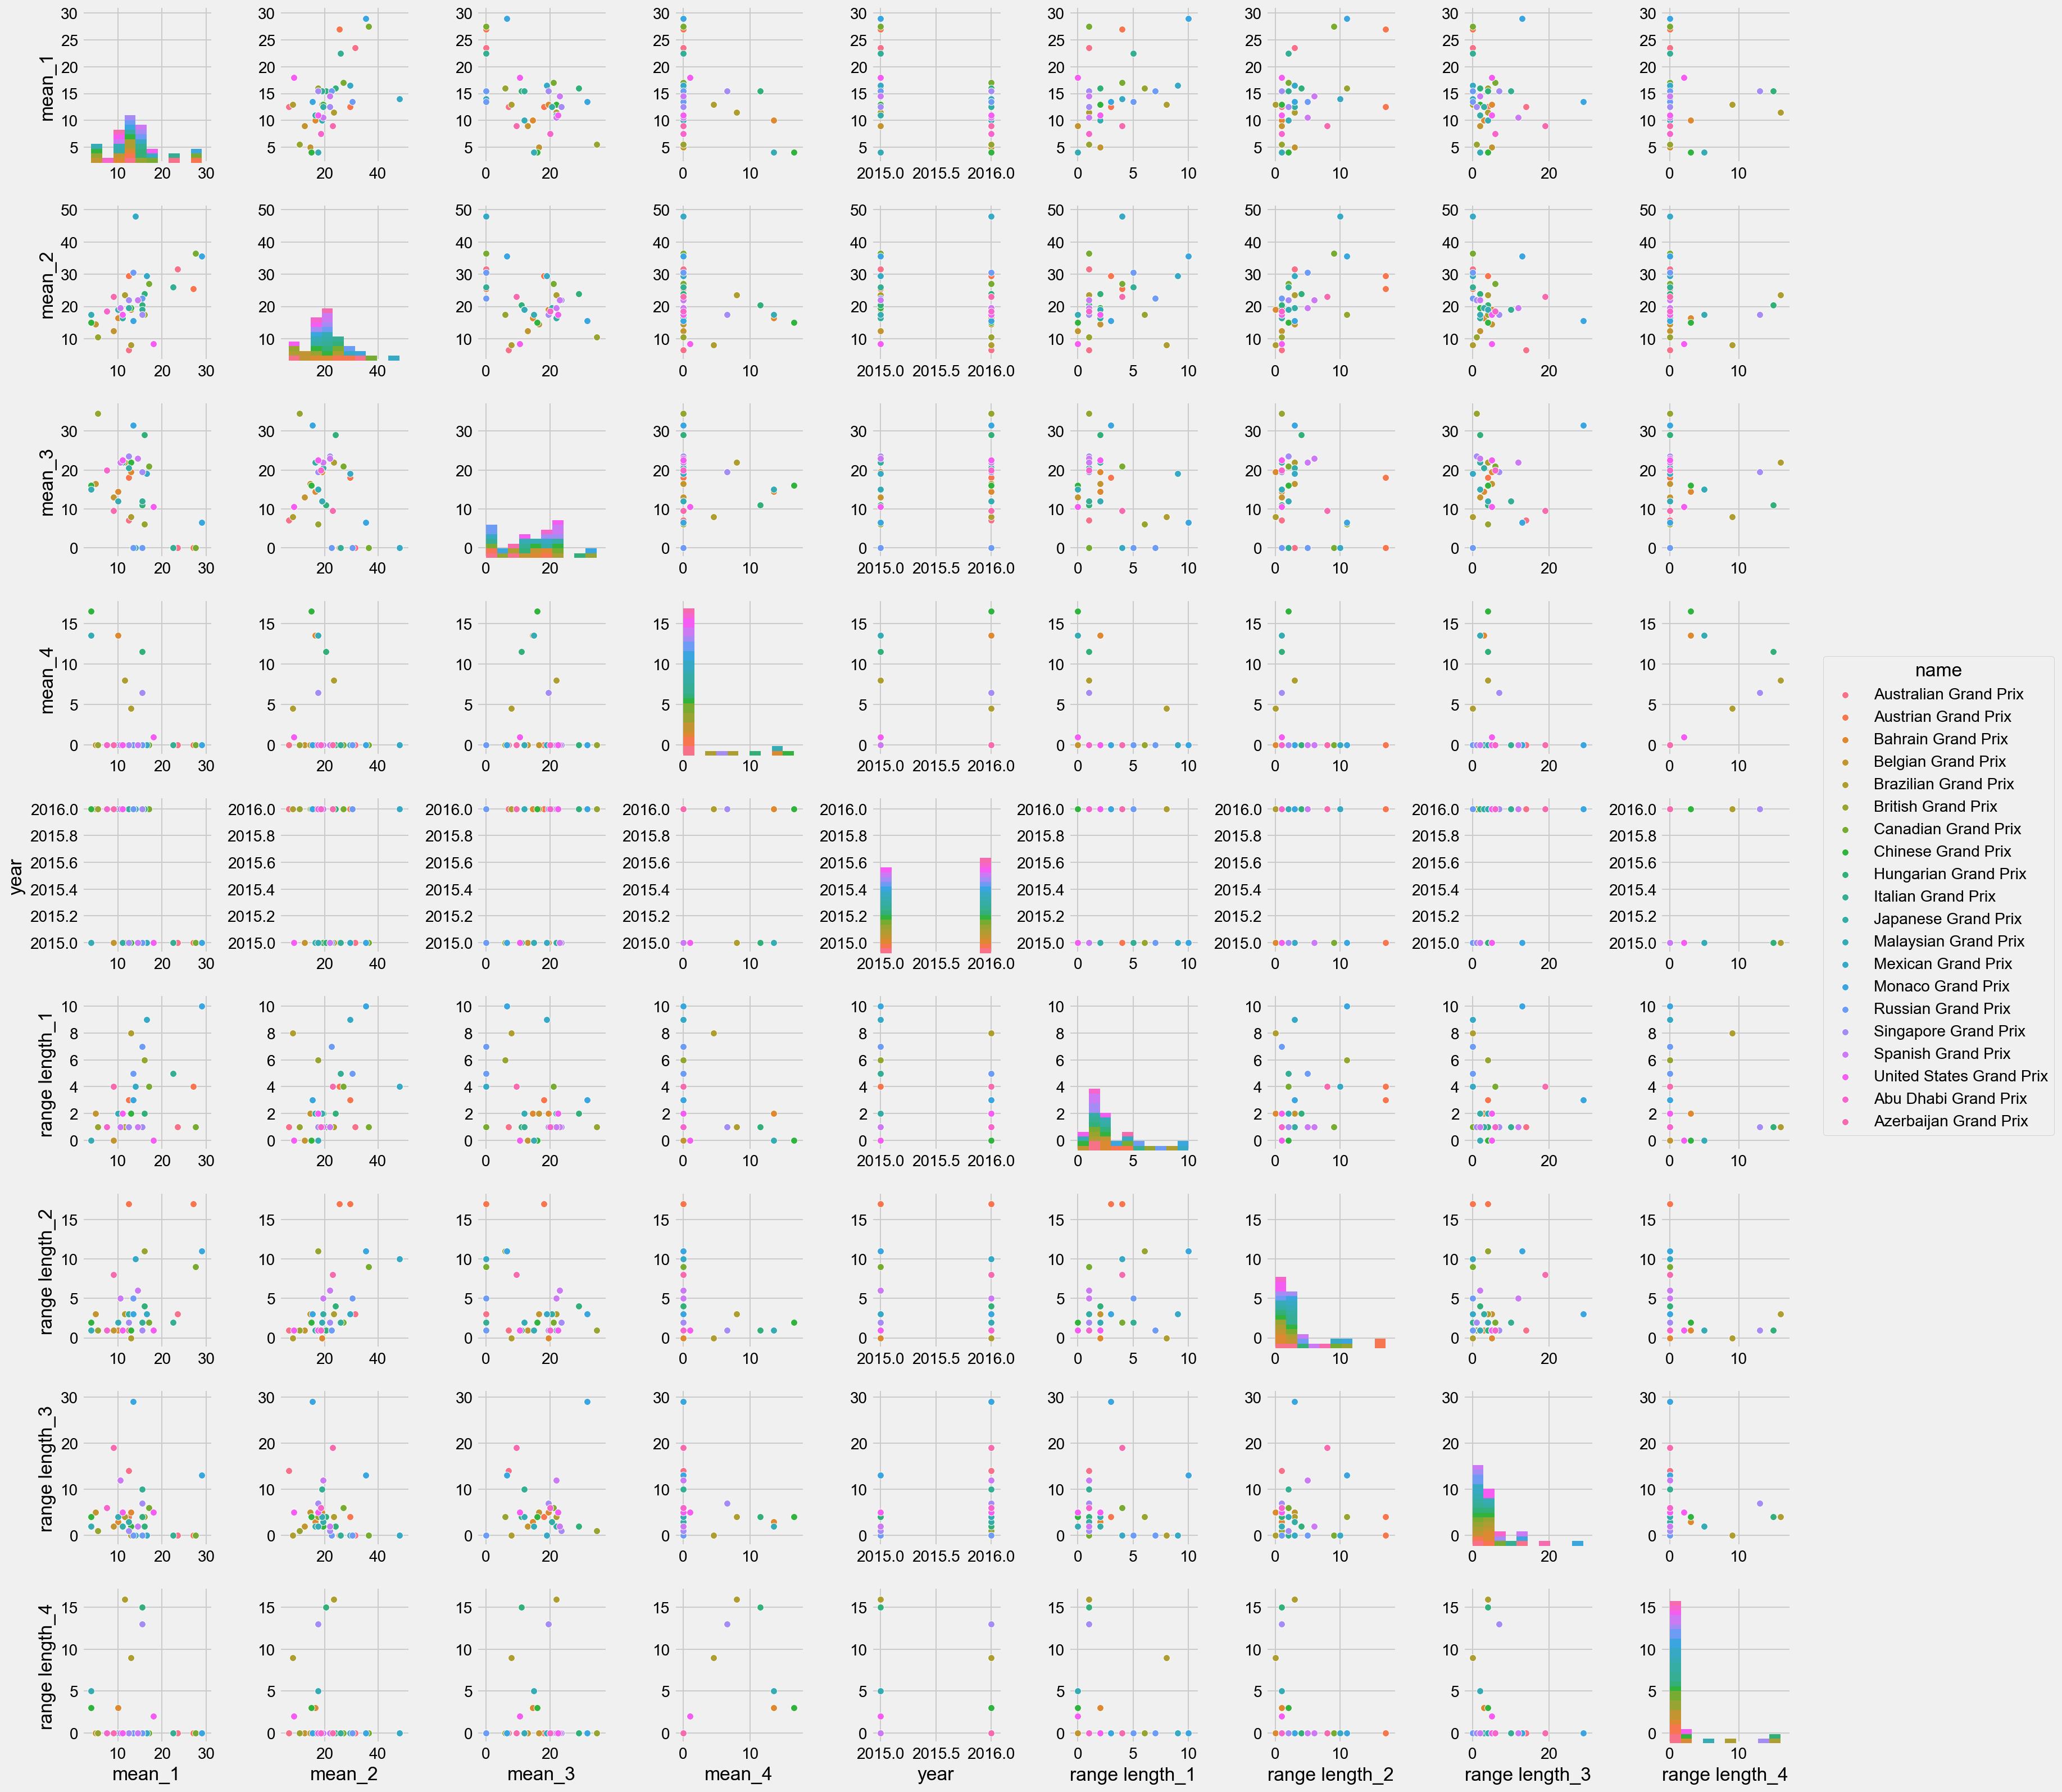

In [16]:
sns.pairplot(data=lr, hue='name')
sns.set(font_scale=1)

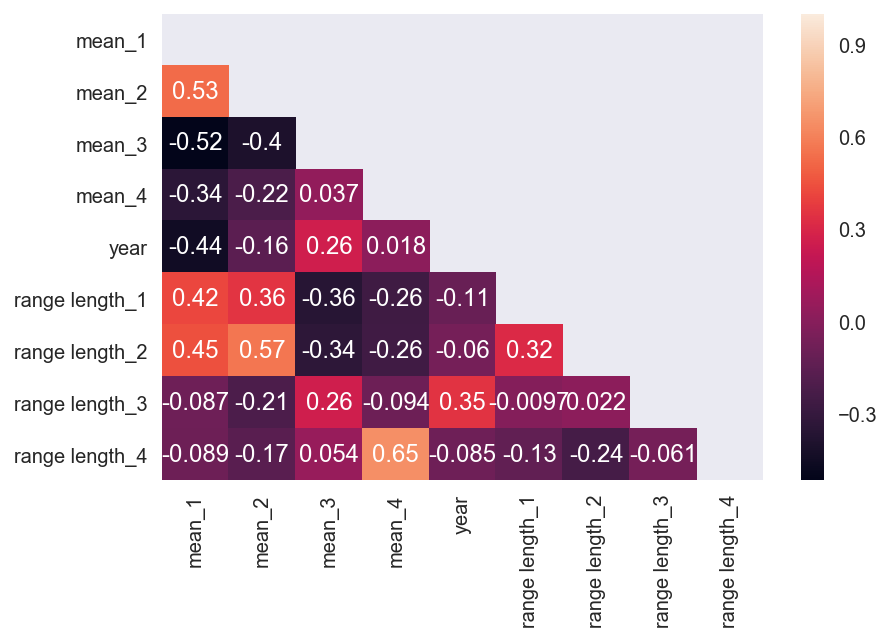

In [17]:
lr_corr = lr.corr() 

def gen_mask(df):
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True         
    return mask

sns.heatmap(lr_corr, mask=gen_mask(lr_corr), annot=True)

#### Are the "tyre" columns correlated?

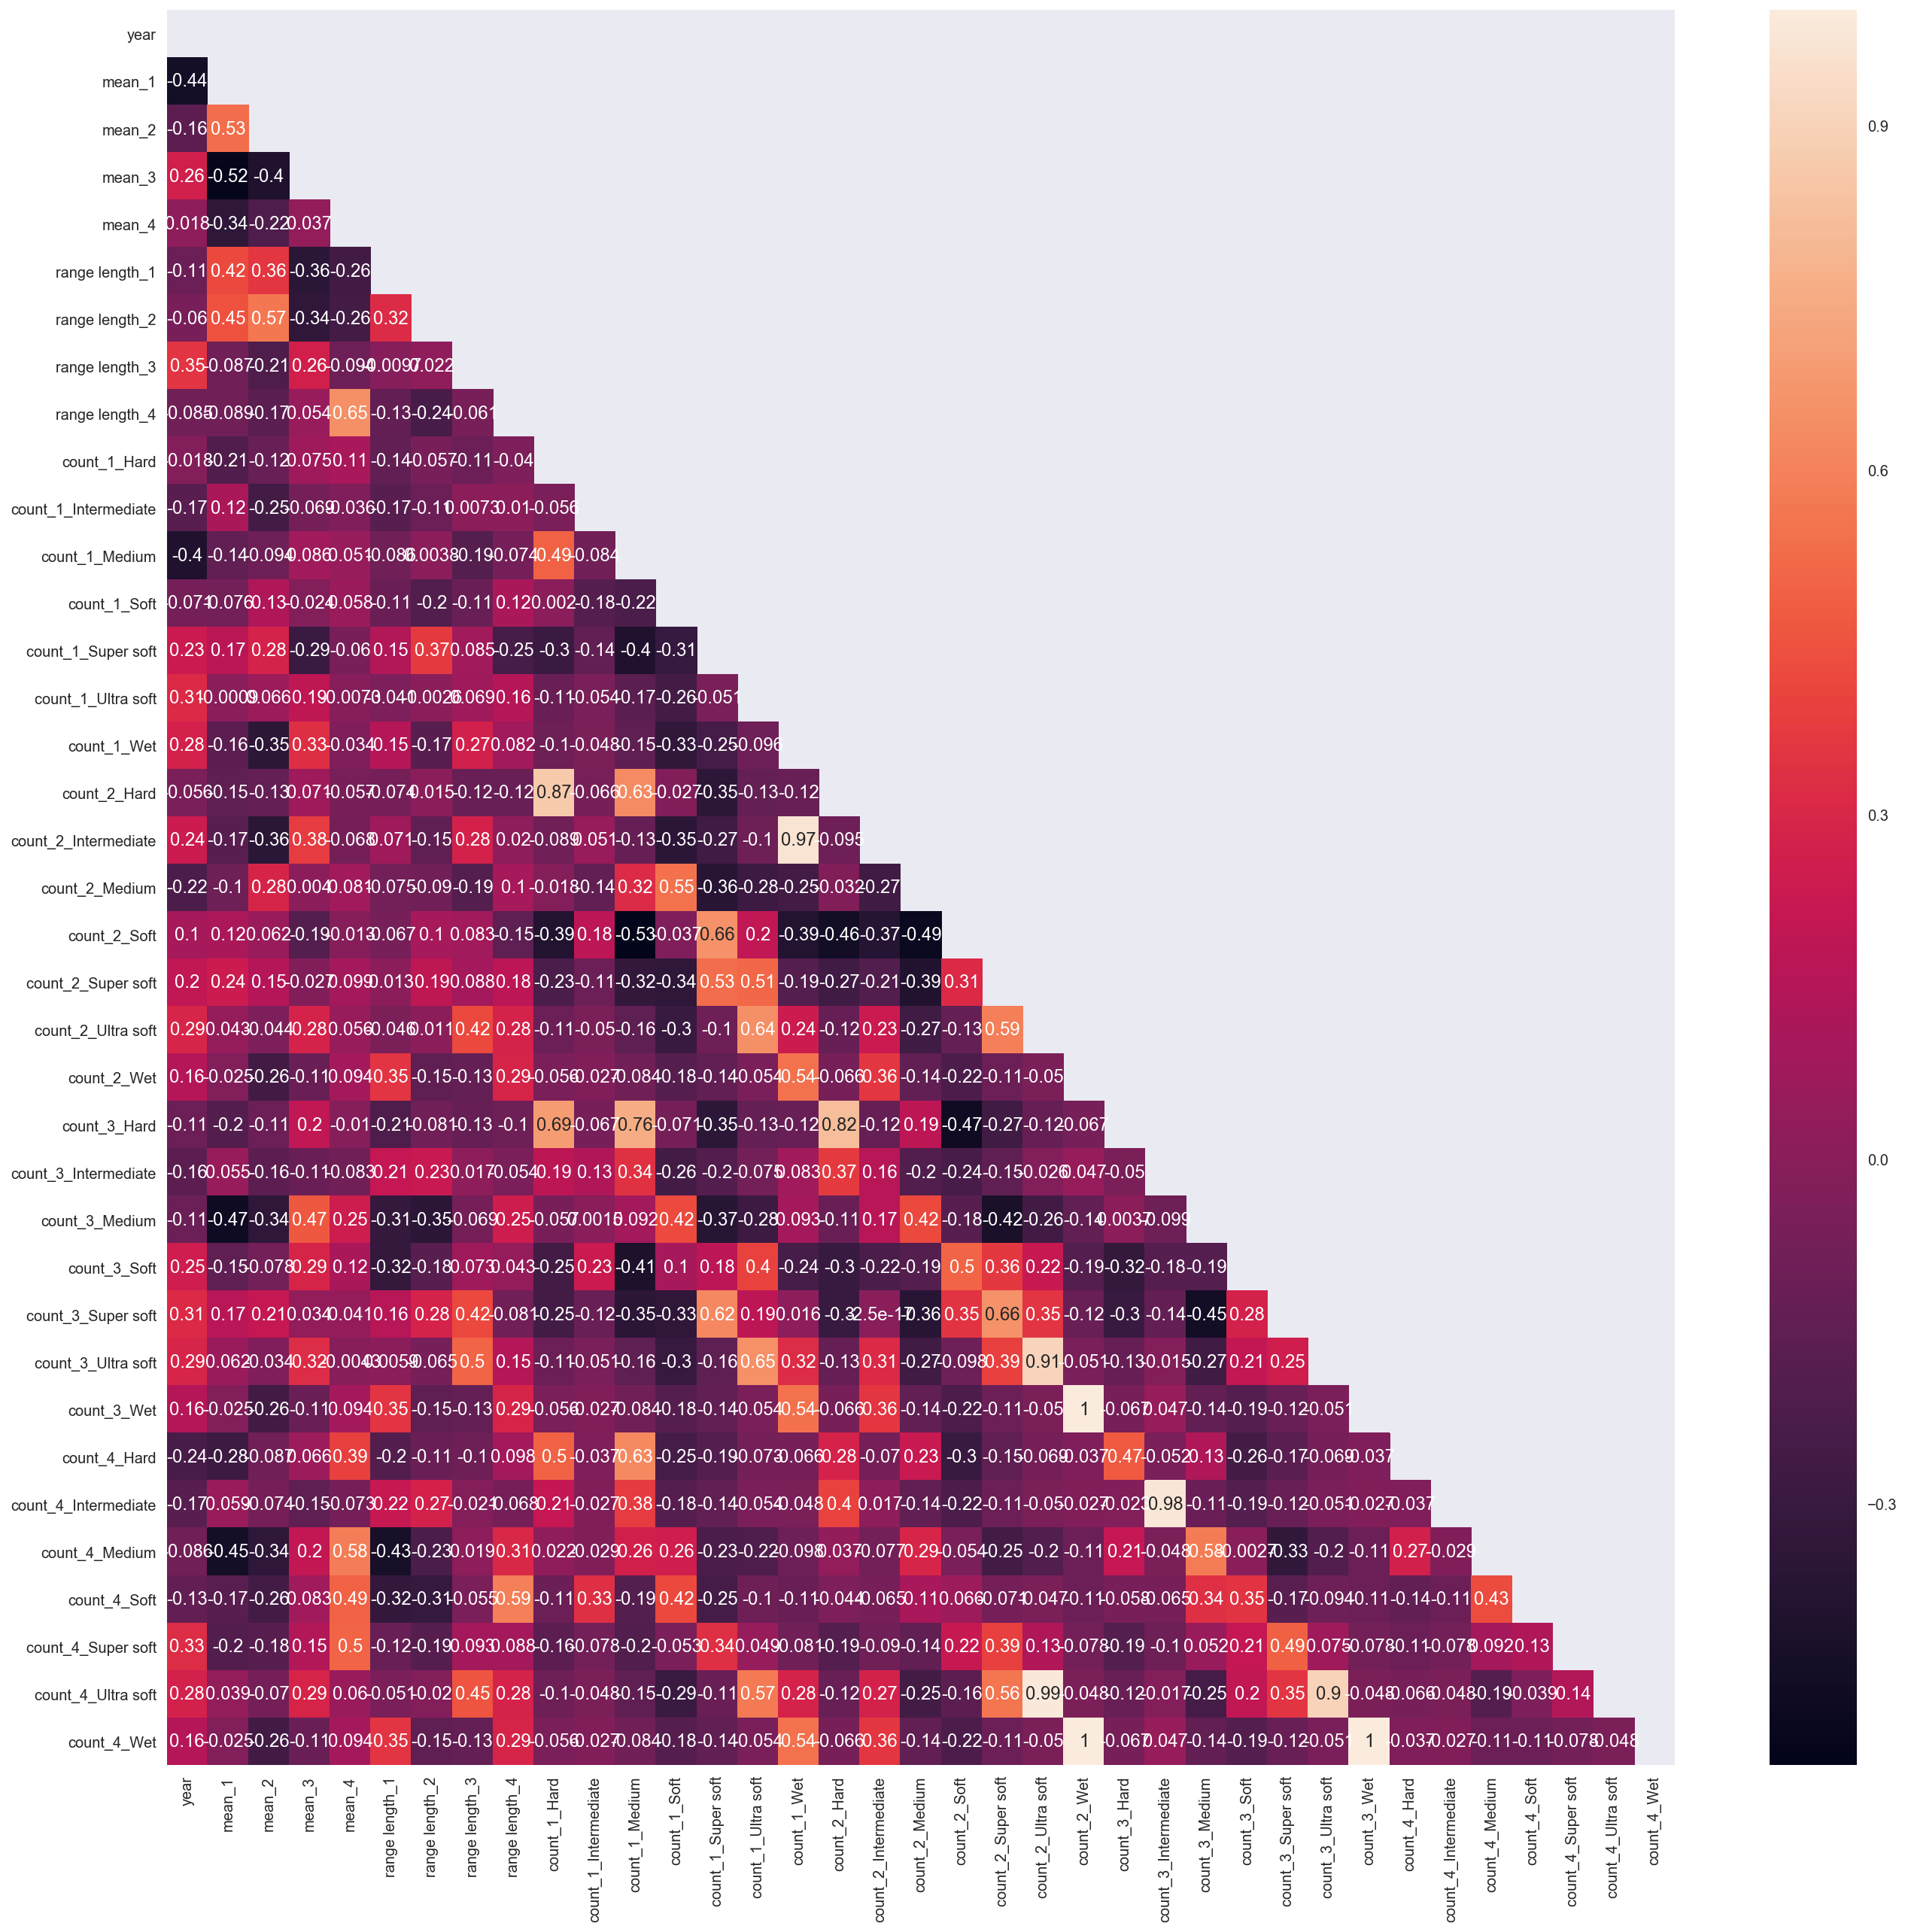

In [18]:
# Remove variables with correlation at or above 0.7
# Remove count_1_hard, count_1_wet,
# Remove count_2_ultrasoft, count_2_wet, count_3_hard,
# Remove count_4_wet, count_4_ultrasoft, count_4_intermediate

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(stints_15_16_clean.corr(), mask=gen_mask(stints_15_16_clean.corr()), annot=True, ax=ax)

In [19]:
clean_new = stints_15_16_clean.drop(['count_1_Hard', 'count_1_Wet',
                                        'count_2_Ultra soft', 'count_2_Wet', 'count_3_Hard', 
                                        "count_4_Wet", "count_4_Ultra soft", "count_4_Intermediate"], axis=1)

In [24]:
clean_new.columns

Index([                u'year',                 u'name',
                     u'mean_1',               u'mean_2',
                     u'mean_3',               u'mean_4',
             u'range length_1',       u'range length_2',
             u'range length_3',       u'range length_4',
       u'count_1_Intermediate',       u'count_1_Medium',
               u'count_1_Soft',   u'count_1_Super soft',
         u'count_1_Ultra soft',         u'count_2_Hard',
       u'count_2_Intermediate',       u'count_2_Medium',
               u'count_2_Soft',   u'count_2_Super soft',
       u'count_3_Intermediate',       u'count_3_Medium',
               u'count_3_Soft',   u'count_3_Super soft',
         u'count_3_Ultra soft',          u'count_3_Wet',
               u'count_4_Hard',       u'count_4_Medium',
               u'count_4_Soft',   u'count_4_Super soft'],
      dtype='object')

In [25]:
clean_new.head()

year                   name  mean_1  mean_2  mean_3  mean_4  \
0  2015  Australian Grand Prix    23.5    31.5     0.0     0.0   
1  2015    Austrian Grand Prix    27.0    25.5     0.0     0.0   
2  2015     Bahrain Grand Prix    13.0    19.0    19.5     0.0   
3  2015     Belgian Grand Prix     9.0    12.5    13.0     0.0   
4  2015   Brazilian Grand Prix    11.5    23.5    22.0     8.0   

   range length_1  range length_2  range length_3  range length_4  \
0             1.0             3.0             0.0             0.0   
1             4.0            17.0             0.0             0.0   
2             2.0             0.0             5.0             0.0   
3             0.0             1.0             2.0             0.0   
4             1.0             3.0             4.0            16.0   

          ...          count_3_Intermediate  count_3_Medium  count_3_Soft  \
0         ...                           0.0             0.0           3.0   
1         ...                           0.0             0.0           1.0   
2         ...                           0.0            14.0           4.0   
3         ...                           0.0             6.0          10.0   
4         ...                           0.0            18.0           1.0   

   count_3_Super soft  count_3_Ultra soft  count_3_Wet  count_4_Hard  \
0                 0.0                 0.0          0.0           0.0   
1                 1.0                 0.0          0.0           0.0   
2                 0.0                 0.0          0.0           0.0   
3                 0.0                 0.0          0.0           0.0   
4                 0.0                 0.0          0.0           0.0   

   count_4_Medium  count_4_Soft  count_4_Super soft  
0             0.0           0.0                 0.0  
1             0.0           0.0                 0.0  
2             4.0           1.0                 0.0  
3             1.0           4.0                 0.0  
4             4.0           7.0                 0.0  

[5 rows x 30 columns]

### Transform the dataset (consisting of only 2015 and 2016 race strategy information) using PCA

In [42]:
from sklearn.decomposition import PCA

X = clean_new.iloc[:,2:].values
SS = StandardScaler()
Xs = SS.fit_transform(X)

pca = PCA()
pca.fit(Xs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
components = pca.components_
len(components)

28

In [44]:
len(Xs)

38

In [45]:
pcs = pca.transform(Xs)
pcs = pd.DataFrame(pcs, columns=['PC'+str(i+1) for i in range(len(components))])
pcs = pd.concat([clean_new.iloc[:,:2], pcs], axis=1) 

In [46]:
exp_var_eigenvals = pca.explained_variance_
exp_var_pct = pca.explained_variance_ratio_

print ('eigenvalues:', exp_var_eigenvals, '\n')
print ('explained variance pct:', exp_var_pct)

('eigenvalues:', array([  5.52782996e+00,   4.12011320e+00,   3.08076471e+00,
         2.20559835e+00,   1.97151721e+00,   1.87786336e+00,
         1.77235814e+00,   1.29067922e+00,   1.10118940e+00,
         8.65684294e-01,   7.97793802e-01,   6.73358880e-01,
         6.30090756e-01,   4.82368760e-01,   4.66628028e-01,
         3.89613765e-01,   3.64740292e-01,   2.89510994e-01,
         2.32084984e-01,   1.89276795e-01,   1.62411544e-01,
         8.14486538e-02,   7.60443491e-02,   5.18666667e-02,
         2.31287529e-02,   1.81258082e-02,   1.29775909e-02,
         1.68849457e-03]), '\n')
('explained variance pct:', array([  1.92227170e-01,   1.43274613e-01,   1.07131856e-01,
         7.66984388e-02,   6.85583993e-02,   6.53016394e-02,
         6.16327549e-02,   4.48826420e-02,   3.82932403e-02,
         3.01036832e-02,   2.77428296e-02,   2.34156753e-02,
         2.19110507e-02,   1.67741016e-02,   1.62267265e-02,
         1.35485990e-02,   1.26836380e-02,   1.00675816e-02,
       

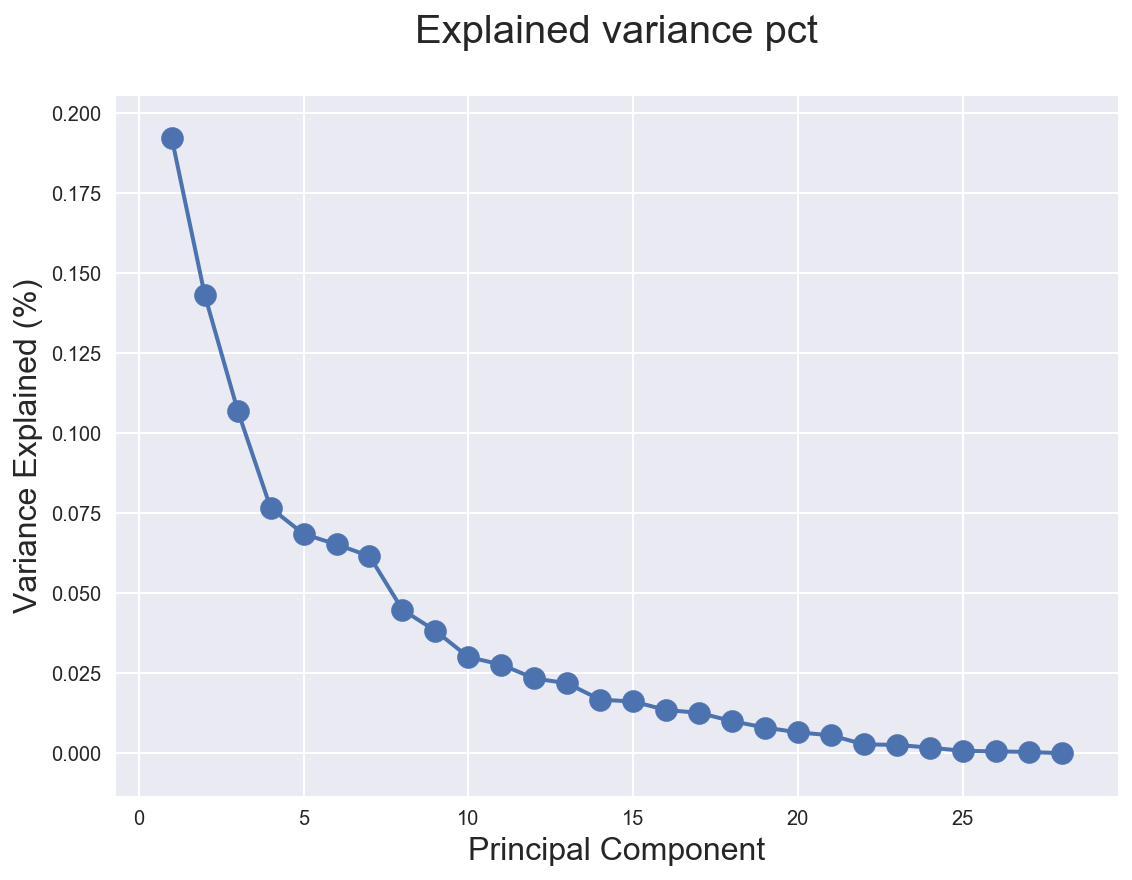

In [47]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, len(exp_var_pct)+1), exp_var_pct, lw=2)
ax.scatter(range(1, len(exp_var_pct)+1), exp_var_pct, s=120)
ax.set_title('Explained variance pct\n', fontsize=20)
ax.set_xlabel('Principal Component', fontsize=16)
ax.set_ylabel('Variance Explained (%)', fontsize=16)
plt.show()

In [53]:
# Check PC1 to PC4

pc = pd.DataFrame({'PC1': pca.components_[0], 'PC2': pca.components_[1], 
              'PC3': pca.components_[2], 'PC4': pca.components_[3]},
             index=clean_new.iloc[:,2:].columns)
pc 

PC1       PC2       PC3       PC4
mean_1               -0.230870  0.209174 -0.120740 -0.101019
mean_2               -0.190466  0.209897 -0.271450  0.108954
mean_3                0.137207 -0.221613  0.257161 -0.022395
mean_4                0.150605 -0.266622 -0.061111  0.303581
range length_1       -0.164634  0.247580  0.029212 -0.135836
range length_2       -0.209999  0.225015 -0.079426  0.130919
range length_3       -0.083868 -0.133417  0.229309 -0.078477
range length_4        0.126757 -0.213808 -0.010840  0.044332
count_1_Intermediate  0.017853 -0.069718  0.022186 -0.205876
count_1_Medium        0.219933  0.236140  0.134005  0.380341
count_1_Soft          0.163970 -0.043425 -0.378259 -0.214793
count_1_Super soft   -0.309440 -0.066507 -0.161822  0.163067
count_1_Ultra soft   -0.155886 -0.163979  0.181442  0.099888
count_2_Hard          0.155350  0.208215  0.151395  0.225133
count_2_Intermediate  0.057030 -0.014935  0.393967 -0.298125
count_2_Medium        0.228203  0.109734 -0.261870  0.048944
count_2_Soft         -0.238051 -0.208683 -0.214250 -0.038139
count_2_Super soft   -0.286523 -0.195021  0.040650  0.241113
count_3_Intermediate  0.031620  0.174664  0.209584  0.010661
count_3_Medium        0.309496 -0.124283 -0.094567 -0.113626
count_3_Soft         -0.114326 -0.328803 -0.075145 -0.050337
count_3_Super soft   -0.307879 -0.151775  0.059721  0.173808
count_3_Ultra soft   -0.123254 -0.150839  0.347486 -0.002030
count_3_Wet           0.025782  0.056375  0.175979 -0.202495
count_4_Hard          0.178717  0.066829  0.095803  0.443570
count_4_Medium        0.275843 -0.170429 -0.111905  0.159687
count_4_Soft          0.165571 -0.269226 -0.176397 -0.128332
count_4_Super soft   -0.069330 -0.276590 -0.022241  0.211540

In [54]:
# Races where drivers favour Medium tyres, do not tend to use Super soft, Ultra Soft tyres, similarly short 1 and 2 stints
pc[['PC1']].sort_values('PC1')

PC1
count_1_Super soft   -0.309440
count_3_Super soft   -0.307879
count_2_Super soft   -0.286523
count_2_Soft         -0.238051
mean_1               -0.230870
range length_2       -0.209999
mean_2               -0.190466
range length_1       -0.164634
count_1_Ultra soft   -0.155886
count_3_Ultra soft   -0.123254
count_3_Soft         -0.114326
range length_3       -0.083868
count_4_Super soft   -0.069330
count_1_Intermediate  0.017853
count_3_Wet           0.025782
count_3_Intermediate  0.031620
count_2_Intermediate  0.057030
range length_4        0.126757
mean_3                0.137207
mean_4                0.150605
count_2_Hard          0.155350
count_1_Soft          0.163970
count_4_Soft          0.165571
count_4_Hard          0.178717
count_1_Medium        0.219933
count_2_Medium        0.228203
count_4_Medium        0.275843
count_3_Medium        0.309496

In [56]:
# Races where drivers do not tend to use Super soft, Soft tyres, short 3 and 4 stints
# Races where drivers favour the harder compounds, longer stint 1 and 2
pc[['PC2']].sort_values('PC2')

PC2
count_3_Soft         -0.328803
count_4_Super soft   -0.276590
count_4_Soft         -0.269226
mean_4               -0.266622
mean_3               -0.221613
range length_4       -0.213808
count_2_Soft         -0.208683
count_2_Super soft   -0.195021
count_4_Medium       -0.170429
count_1_Ultra soft   -0.163979
count_3_Super soft   -0.151775
count_3_Ultra soft   -0.150839
range length_3       -0.133417
count_3_Medium       -0.124283
count_1_Intermediate -0.069718
count_1_Super soft   -0.066507
count_1_Soft         -0.043425
count_2_Intermediate -0.014935
count_3_Wet           0.056375
count_4_Hard          0.066829
count_2_Medium        0.109734
count_3_Intermediate  0.174664
count_2_Hard          0.208215
mean_1                0.209174
mean_2                0.209897
range length_2        0.225015
count_1_Medium        0.236140
range length_1        0.247580

In [57]:
# PC3: range length 3 abv avg, count 2 I abv avg, count 3 US, abv avg, count 1 S below avg, count 2 M below avg, 
# PC3: Description: races where most drivers tend to have similarly short first 2 stints that do no use SS, S and M.
# Intermediate tyres used in second, third stints (suggest rain mid-race)
# Stint 3 lengths are long probably to make up for the short first 2 stints. Drivers do not tend to have similar stint 3 lengths
# Rainy weather brings great unpredictability to race strategy.
pc[['PC3']].sort_values('PC3')

PC3
count_1_Soft         -0.378259
mean_2               -0.271450
count_2_Medium       -0.261870
count_2_Soft         -0.214250
count_4_Soft         -0.176397
count_1_Super soft   -0.161822
mean_1               -0.120740
count_4_Medium       -0.111905
count_3_Medium       -0.094567
range length_2       -0.079426
count_3_Soft         -0.075145
mean_4               -0.061111
count_4_Super soft   -0.022241
range length_4       -0.010840
count_1_Intermediate  0.022186
range length_1        0.029212
count_2_Super soft    0.040650
count_3_Super soft    0.059721
count_4_Hard          0.095803
count_1_Medium        0.134005
count_2_Hard          0.151395
count_3_Wet           0.175979
count_1_Ultra soft    0.181442
count_3_Intermediate  0.209584
range length_3        0.229309
mean_3                0.257161
count_3_Ultra soft    0.347486
count_2_Intermediate  0.393967

In [58]:
# More predictable races. If SS, S, M is the mandatory set, short first stint of SS, then S, SS in long stint 3 (a 2 stop strategy is popular)
# If S,M,H is the mandatory set, short first stint of M, then H
# I tyres in stint 3 suggest starts to rain mid-race
pc[['PC4']].sort_values('PC4')

PC4
count_2_Intermediate -0.298125
count_1_Soft         -0.214793
count_1_Intermediate -0.205876
count_3_Wet          -0.202495
range length_1       -0.135836
count_4_Soft         -0.128332
count_3_Medium       -0.113626
mean_1               -0.101019
range length_3       -0.078477
count_3_Soft         -0.050337
count_2_Soft         -0.038139
mean_3               -0.022395
count_3_Ultra soft   -0.002030
count_3_Intermediate  0.010661
range length_4        0.044332
count_2_Medium        0.048944
count_1_Ultra soft    0.099888
mean_2                0.108954
range length_2        0.130919
count_4_Medium        0.159687
count_1_Super soft    0.163067
count_3_Super soft    0.173808
count_4_Super soft    0.211540
count_2_Hard          0.225133
count_2_Super soft    0.241113
mean_4                0.303581
count_1_Medium        0.380341
count_4_Hard          0.443570

In [59]:
pcs.index = pd.MultiIndex.from_arrays(pcs[['year', 'name']].values.T, names=['idx1', 'idx2'])
pcs = pcs.drop(['year', 'name'], axis=1)
pcs

PC1       PC2       PC3       PC4  \
idx1 idx2                                                               
2015 Australian Grand Prix    -0.059987  2.295609 -1.285136 -0.485674   
     Austrian Grand Prix      -3.111752  2.372842 -1.249468  0.209949   
     Bahrain Grand Prix        1.682397 -0.465824 -0.941737 -1.239914   
     Belgian Grand Prix        1.575999 -0.750036 -0.941440 -1.122728   
     Brazilian Grand Prix      4.075299 -1.487018 -1.930704 -0.460257   
     British Grand Prix        0.734293  4.614832  2.800974  1.135969   
     Canadian Grand Prix      -3.077924  1.668018 -1.662683  0.340167   
     Chinese Grand Prix        1.561491  0.255682 -0.772678 -1.197970   
     Hungarian Grand Prix      2.745220 -3.121132 -2.481730 -0.683660   
     Italian Grand Prix        0.285148  2.362233 -1.637310 -0.973811   
     Japanese Grand Prix       2.869682  2.234778  1.650870  1.966864   
     Malaysian Grand Prix      4.867830  0.769476  1.320209  5.109503   
     Mexican Grand Prix        1.032417  1.567410 -1.564543 -1.408998   
     Monaco Grand Prix        -4.825848  1.571767 -0.672651  0.521103   
     Russian Grand Prix       -1.960938  1.366833 -0.605846 -0.313221   
     Singapore Grand Prix     -2.486037 -1.861124 -0.136776  0.775474   
     Spanish Grand Prix        2.857806  2.297697  0.730743  2.260743   
     United States Grand Prix  0.584485 -1.701275  0.404824 -2.689370   
2016 Abu Dhabi Grand Prix     -1.613388 -1.796690  0.674220 -0.028324   
     Australian Grand Prix    -0.198880 -1.121692 -0.075249 -0.066852   
     Austrian Grand Prix      -3.766338 -0.085301  0.316190  1.131955   
     Azerbaijan Grand Prix    -2.427241 -0.051542 -0.016025 -0.056095   
     Bahrain Grand Prix       -0.742862 -3.512748 -0.717003  2.078475   
     Belgian Grand Prix        1.228627 -0.913519 -0.590951 -0.459397   
     Brazilian Grand Prix      0.844108  1.375678  3.210992 -2.645204   
     British Grand Prix        2.868701 -0.572806  3.184272 -2.247026   
     Canadian Grand Prix      -2.537623 -1.161914  2.088549 -0.218838   
     Chinese Grand Prix        1.795617 -4.408097 -1.621697  1.598765   
     Hungarian Grand Prix     -2.159273 -1.258968 -0.474583  0.110640   
     Italian Grand Prix       -1.915231 -0.818672 -0.325273  0.230478   
     Japanese Grand Prix       1.476947  1.684459  0.692933  0.152591   
     Malaysian Grand Prix      1.642734  0.595413 -0.263130 -0.480542   
     Mexican Grand Prix       -0.863033  2.778206 -2.450410  0.151748   
     Monaco Grand Prix        -1.130404 -1.054763  5.591331 -1.670646   
     Russian Grand Prix       -2.328907  1.406080 -1.148870  0.172019   
     Singapore Grand Prix     -2.640370 -4.202812  2.589318  1.949330   
     Spanish Grand Prix        2.597553 -0.214510 -1.238694 -1.113192   
     United States Grand Prix  0.519682 -0.656570 -0.450840 -0.334055   

                                    PC5       PC6       PC7       PC8  \
idx1 idx2                                                               
2015 Australian Grand Prix     0.139716  1.101907  0.644783 -0.466398   
     Austrian Grand Prix       0.983116 -0.609055  0.221204  0.412346   
     Bahrain Grand Prix       -1.143359 -0.200887 -0.395790 -0.296180   
     Belgian Grand Prix       -0.996574 -0.210338  0.830138 -0.766423   
     Brazilian Grand Prix      1.395645  2.403445 -0.422845  1.584241   
     British Grand Prix        1.128059 -1.848919  2.015993  3.073539   
     Canadian Grand Prix       0.568044 -0.280884  0.457885 -0.143249   
     Chinese Grand Prix       -1.258436  0.403221 -0.427322 -0.710056   
     Hungarian Grand Prix      2.332212  0.792503  1.431929  1.463780   
     Italian Grand Prix        0.418214  1.253577  0.247375 -0.304285   
     Japanese Grand Prix      -0.986863 -0.371539  0.390695 -0.738303   
     Malaysian Grand Prix      0.711635 -0.139425 -0.248553 -1.389545   
     Mexican Grand Prix       -0.294361  2.051532 -0.294973 -0.037197   
     Monaco Grand Pr

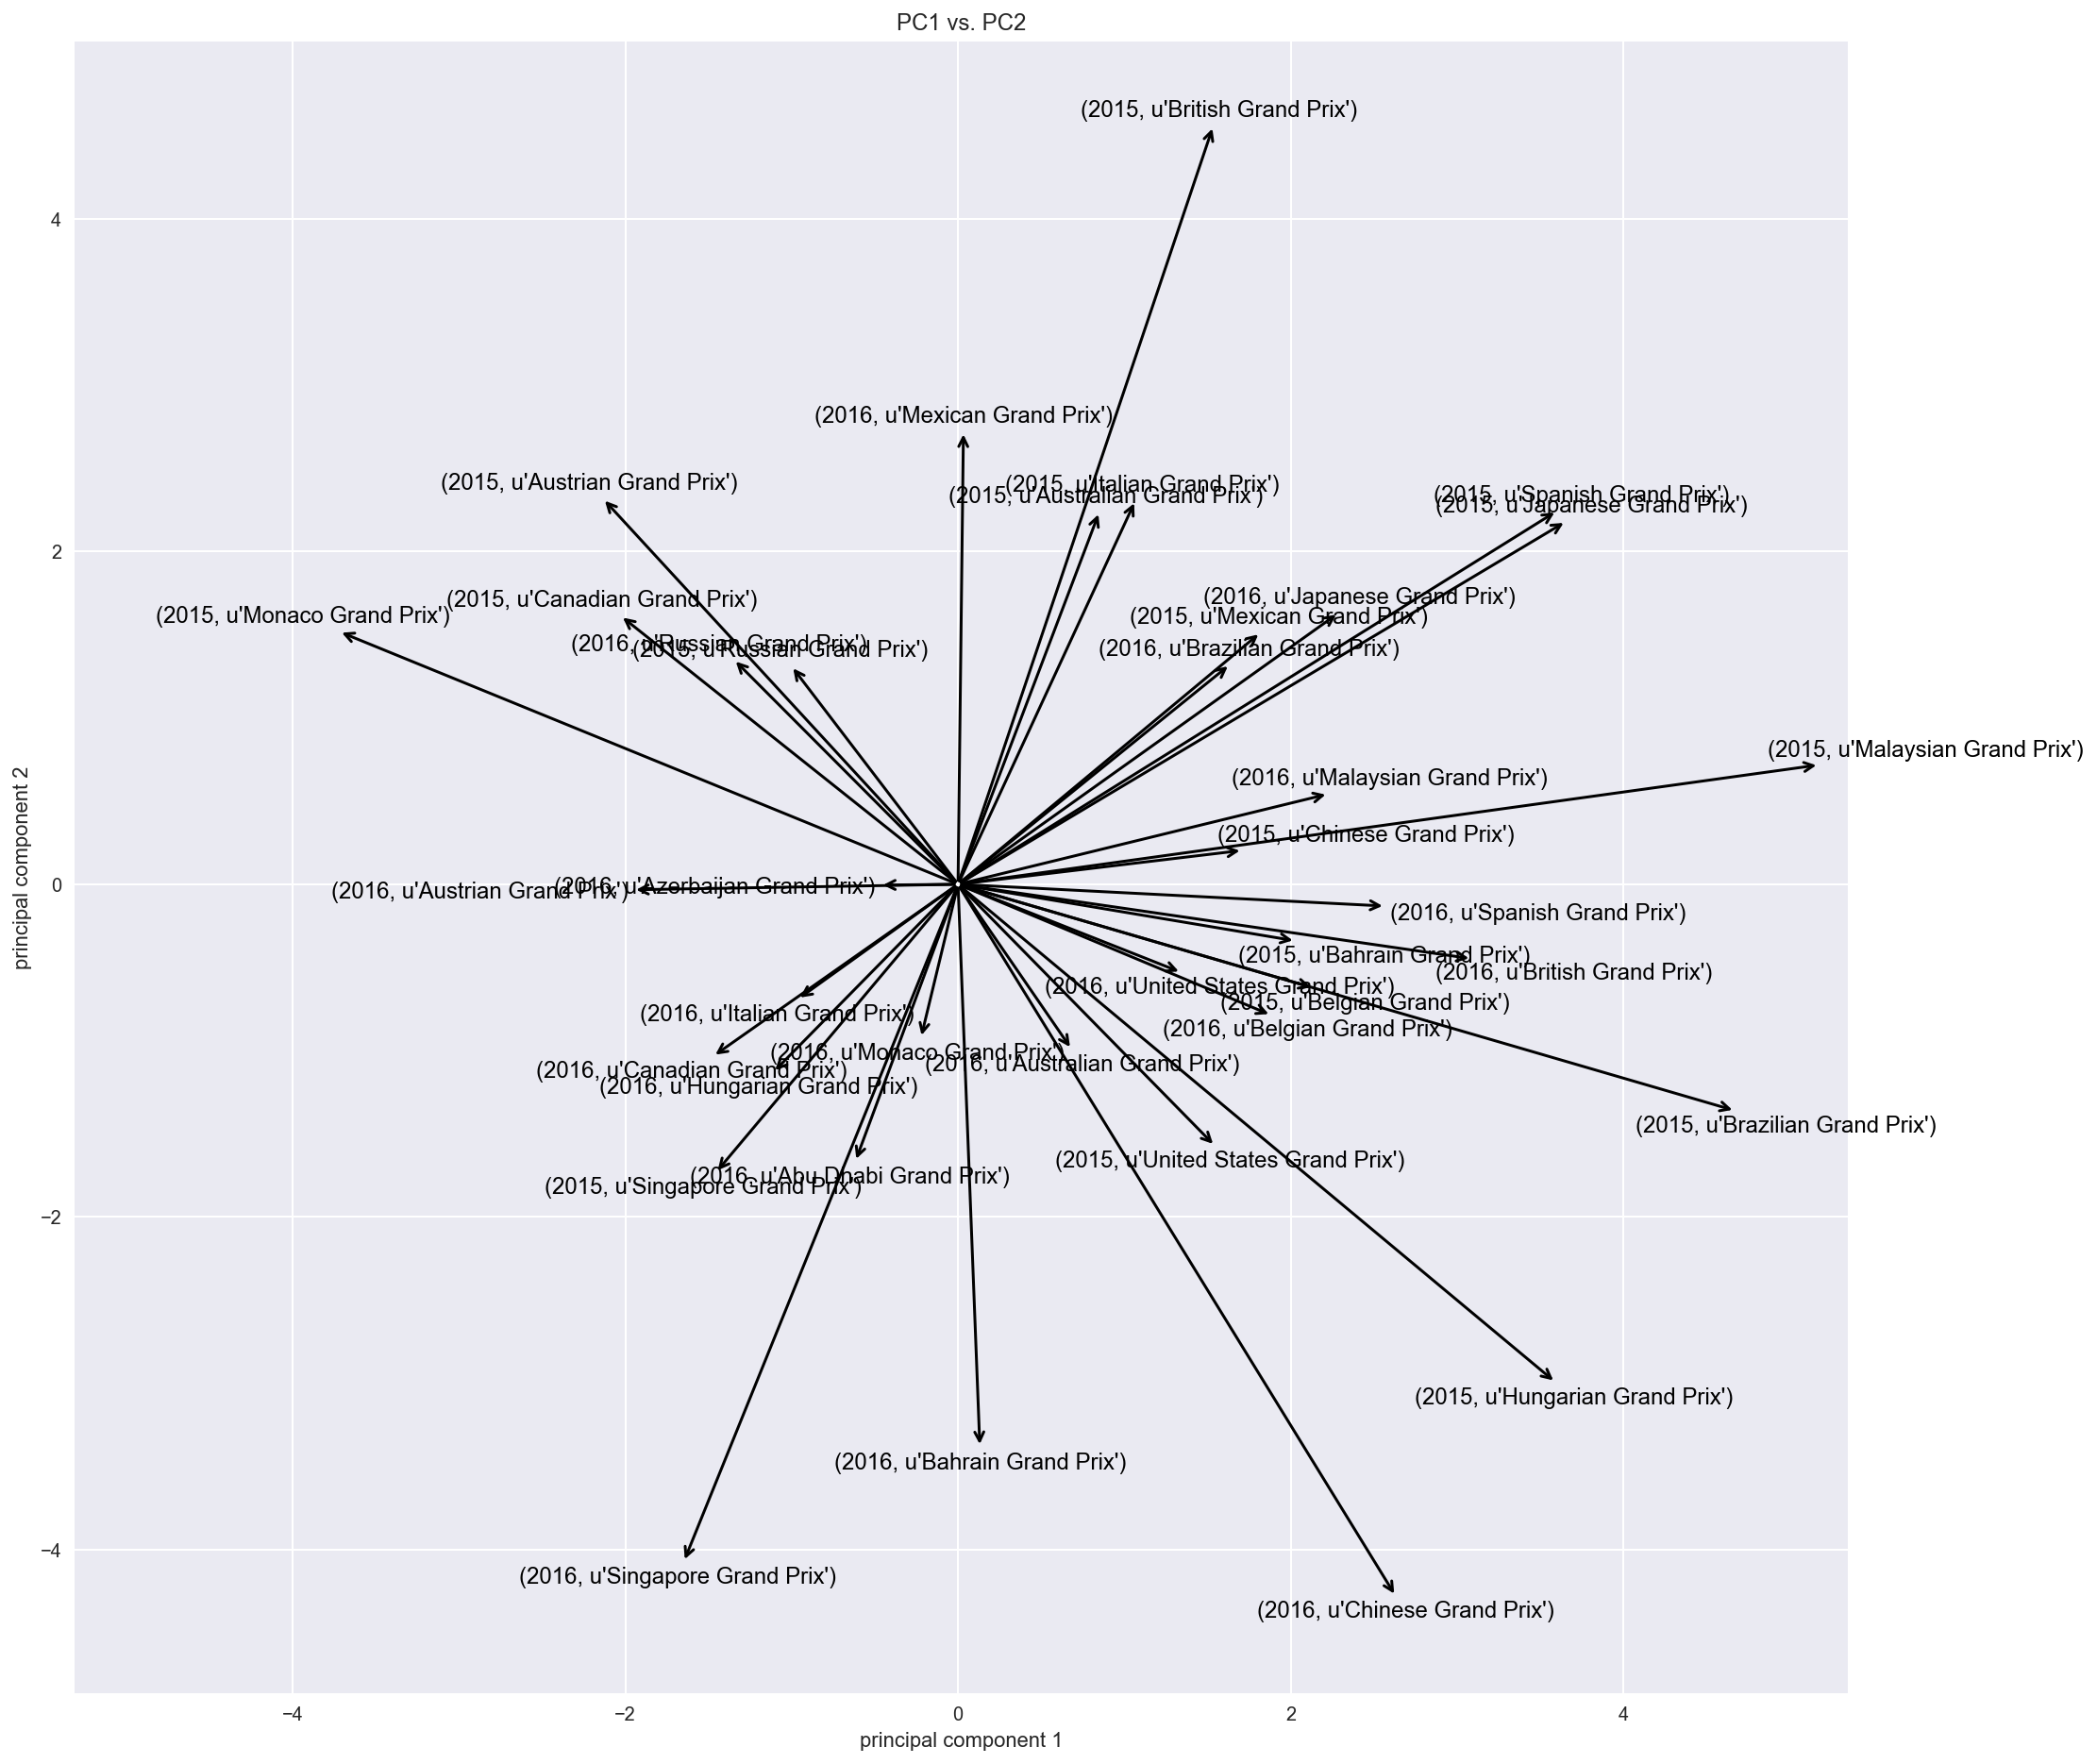

In [60]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(pcs.PC1.values, pcs.PC2.values, s=0)

for i, txt in enumerate(pcs.index.values):
    ax.annotate(txt, (0, 0), (pcs.PC1.values[i], pcs.PC2.values[i]),
            arrowprops=dict(arrowstyle='<-', color='black', linewidth=1.5),
            xycoords='data', textcoords='data', fontsize=12, color="black")

ax.set_title('PC1 vs. PC2')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

In [ ]:
# Findings: Only some races seems to follow the same trend of long stint 1 and 2 and short stint 3 and 4,
# with the exception of street circuits like Azerbaijan Grand Prix, Singapore Grand Prix 
# Bahrain, United States, Hungarian see similar strategy over the years

# almost all 2017 races seem to show difference from their 2015 and 2016 races

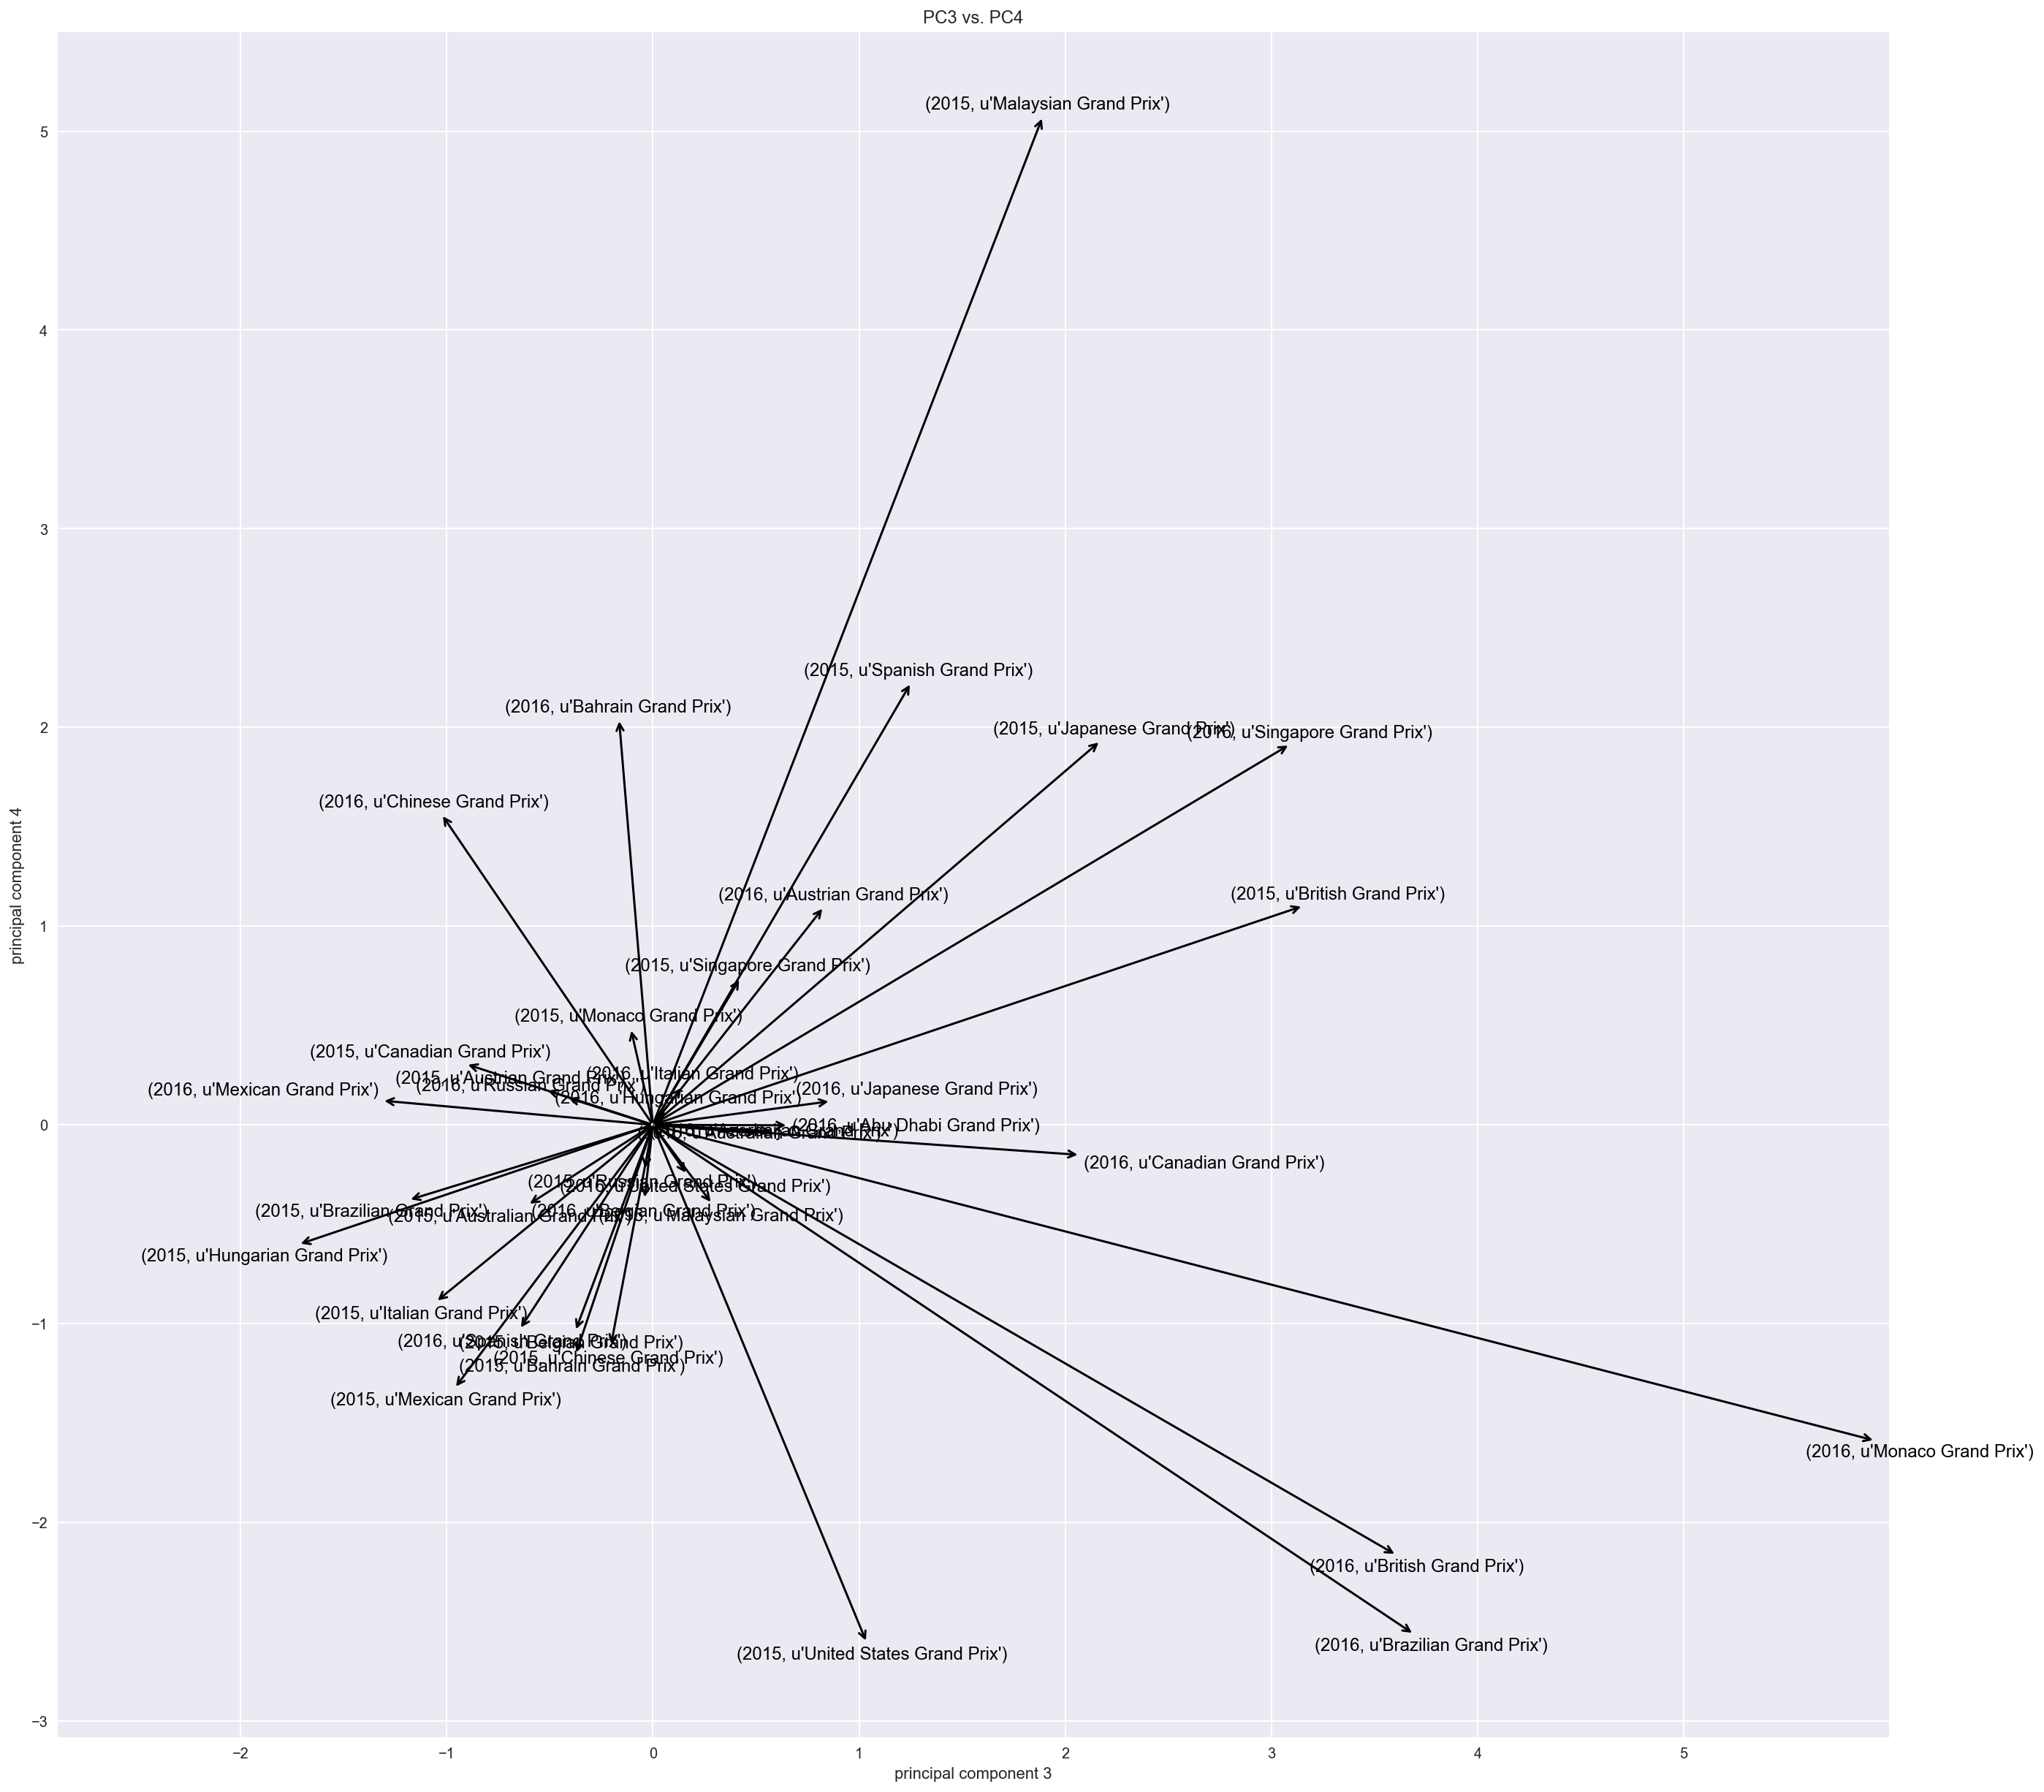

In [61]:
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(pcs.PC3.values, pcs.PC4.values, s=0)

for i, txt in enumerate(pcs.index.values):
    ax.annotate(txt, (0, 0), (pcs.PC3.values[i], pcs.PC4.values[i]),
            arrowprops=dict(arrowstyle='<-', color='black', linewidth=1.5),
            xycoords='data', textcoords='data', fontsize=12, color="black")

ax.set_title('PC3 vs. PC4')
ax.set_xlabel('principal component 3')
ax.set_ylabel('principal component 4')
plt.show()

In [ ]:
#Findings: Races located in the top right hand corner of graph suffered wet weather
# Many races clumped together in the top left hand corner. These are the races in dry conditions 
# and having relatively predicablte race strategy of either S, M, H or SS, S, M

In [65]:
opt_cluster(ran, pcs.iloc[:,0:4])

k                   c5
silhouette    0.352289
processing     default
Name: 3, dtype: object

/Users/dianaow/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


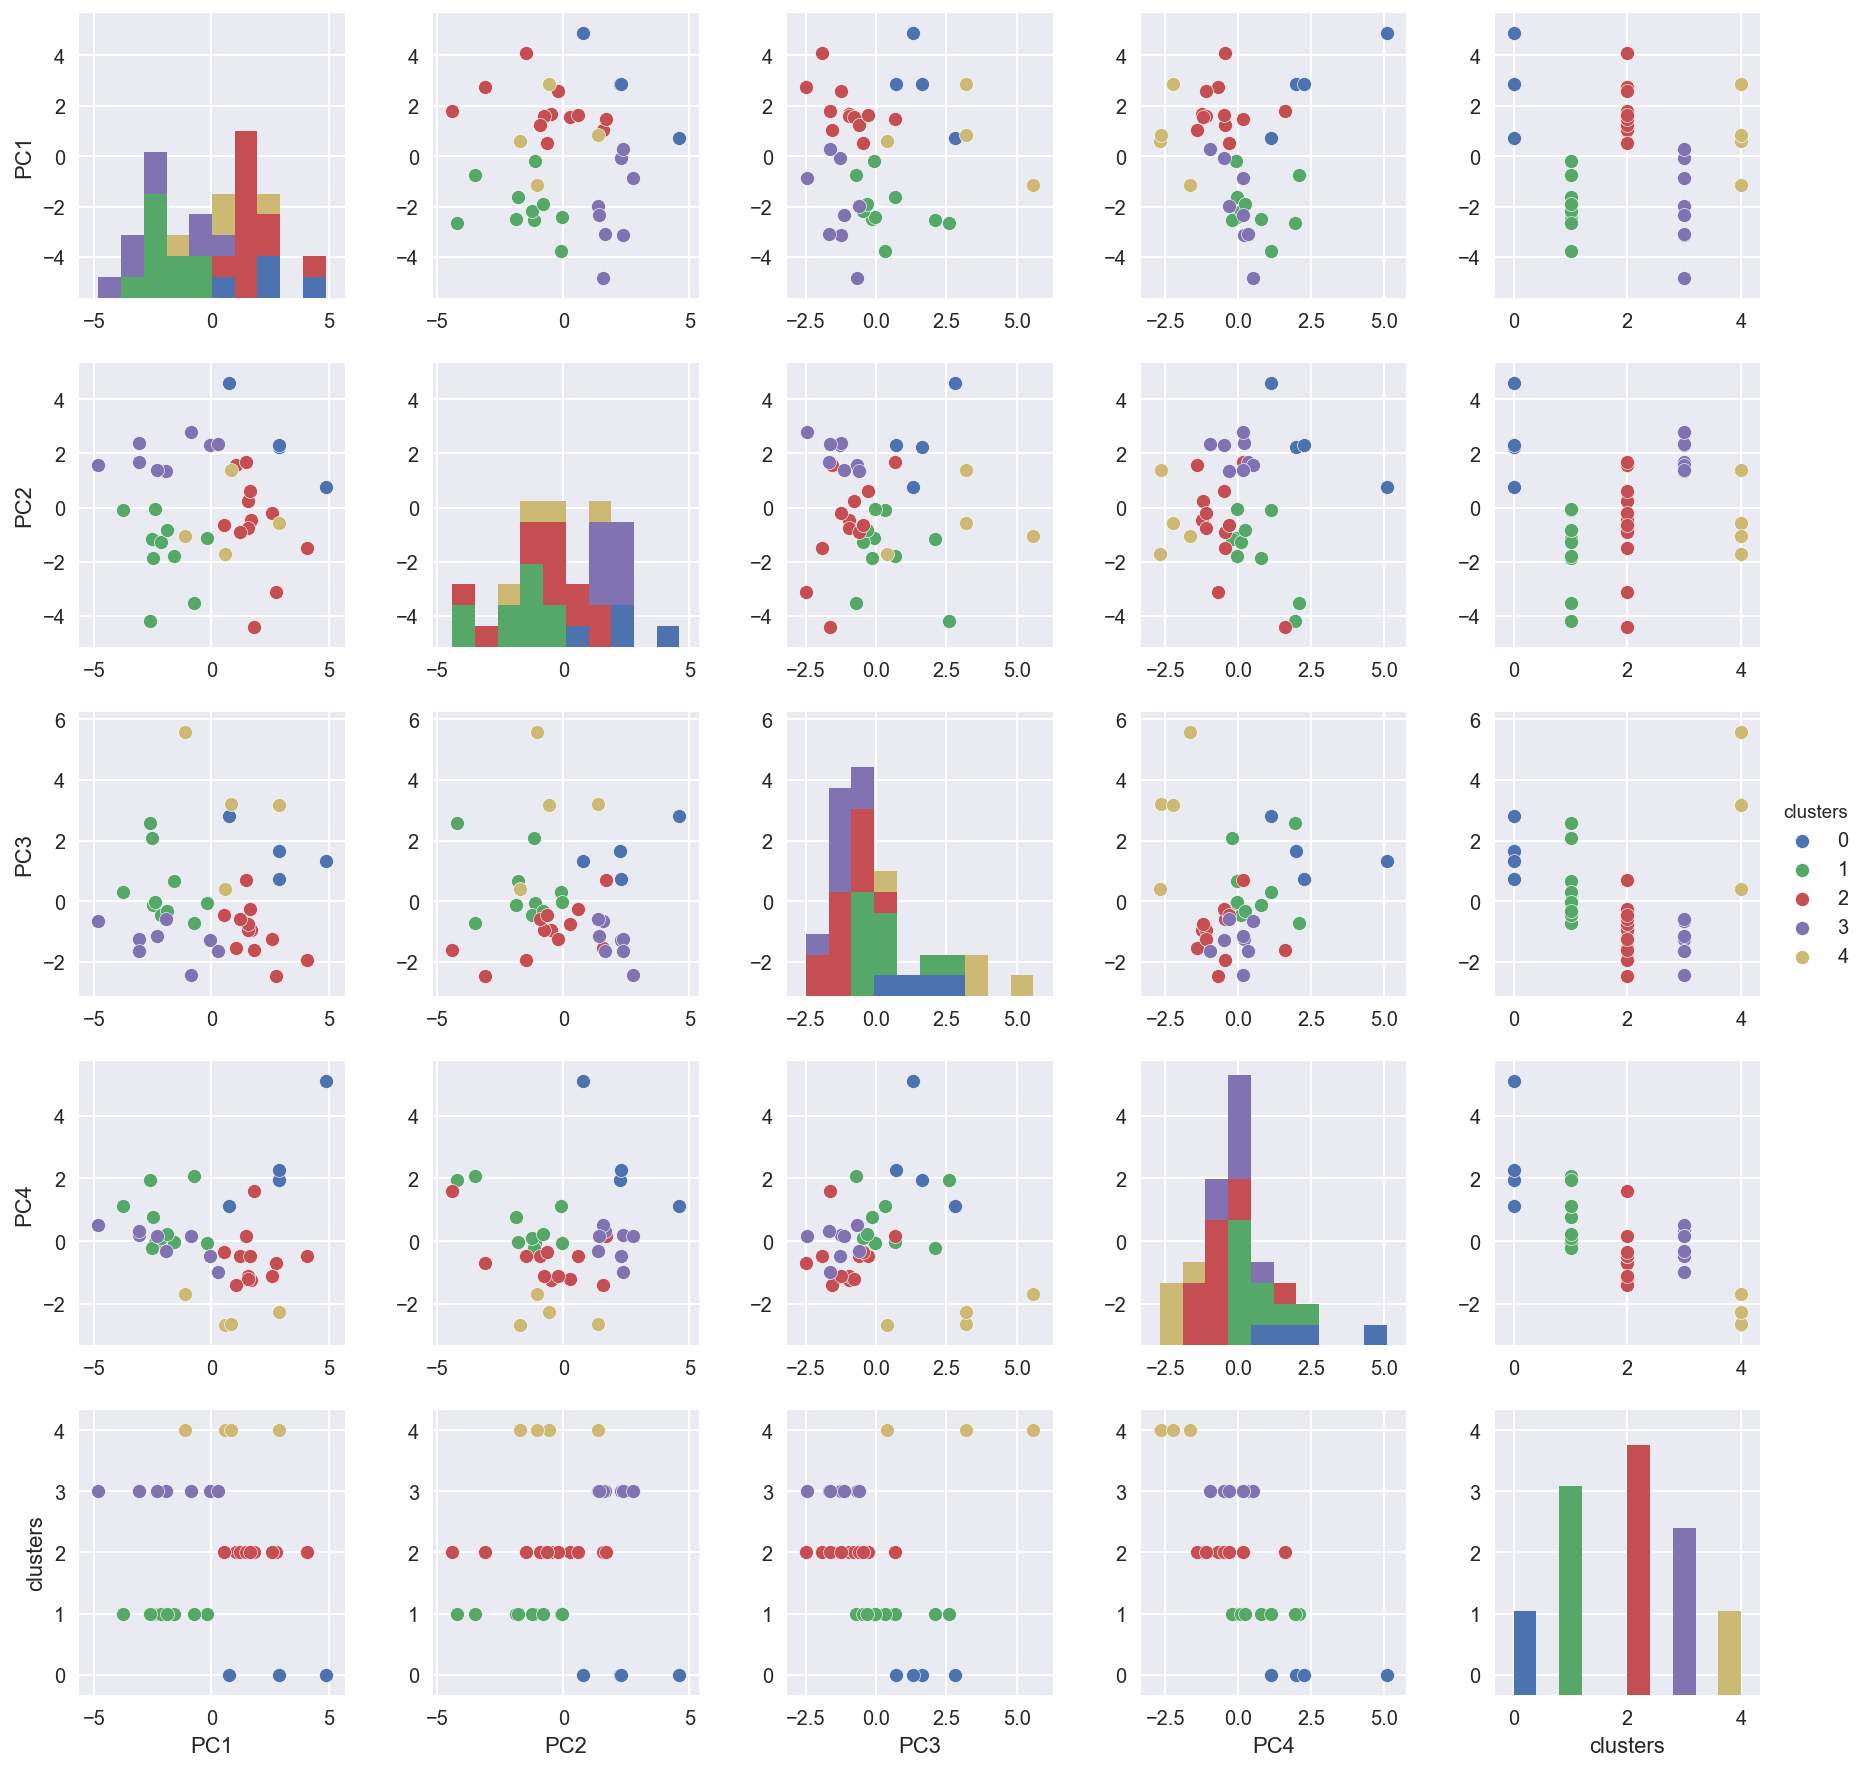

In [67]:
# build the model with the found optimal parameters

k_mean_opt = KMeans(n_clusters=5)
k_mean_opt.fit(pcs.iloc[:,0:4])
labels_opt = k_mean_opt.labels_

X_k = pcs.iloc[:,0:4]

X_k['clusters']=labels_opt
sns.pairplot(data=X_k, hue='clusters')

In [75]:
# Findings: Clusterings are accurate, comparing each cluster against the actual tyre combination and stint lengths
X_k.reset_index().sort_values("clusters")

idx1                      idx2       PC1       PC2       PC3       PC4  \
5   2015        British Grand Prix  0.734293  4.614832  2.800974  1.135969   
11  2015      Malaysian Grand Prix  4.867830  0.769476  1.320209  5.109503   
10  2015       Japanese Grand Prix  2.869682  2.234778  1.650870  1.966864   
16  2015        Spanish Grand Prix  2.857806  2.297697  0.730743  2.260743   
18  2016      Abu Dhabi Grand Prix -1.613388 -1.796690  0.674220 -0.028324   
15  2015      Singapore Grand Prix -2.486037 -1.861124 -0.136776  0.775474   
20  2016       Austrian Grand Prix -3.766338 -0.085301  0.316190  1.131955   
21  2016     Azerbaijan Grand Prix -2.427241 -0.051542 -0.016025 -0.056095   
22  2016        Bahrain Grand Prix -0.742862 -3.512748 -0.717003  2.078475   
26  2016       Canadian Grand Prix -2.537623 -1.161914  2.088549 -0.218838   
28  2016      Hungarian Grand Prix -2.159273 -1.258968 -0.474583  0.110640   
29  2016        Italian Grand Prix -1.915231 -0.818672 -0.325273  0.230478   
35  2016      Singapore Grand Prix -2.640370 -4.202812  2.589318  1.949330   
19  2016     Australian Grand Prix -0.198880 -1.121692 -0.075249 -0.066852   
27  2016        Chinese Grand Prix  1.795617 -4.408097 -1.621697  1.598765   
30  2016       Japanese Grand Prix  1.476947  1.684459  0.692933  0.152591   
31  2016      Malaysian Grand Prix  1.642734  0.595413 -0.263130 -0.480542   
23  2016        Belgian Grand Prix  1.228627 -0.913519 -0.590951 -0.459397   
37  2016  United States Grand Prix  0.519682 -0.656570 -0.450840 -0.334055   
12  2015        Mexican Grand Prix  1.032417  1.567410 -1.564543 -1.408998   
2   2015        Bahrain Grand Prix  1.682397 -0.465824 -0.941737 -1.239914   
3   2015        Belgian Grand Prix  1.575999 -0.750036 -0.941440 -1.122728   
8   2015      Hungarian Grand Prix  2.745220 -3.121132 -2.481730 -0.683660   
7   2015        Chinese Grand Prix  1.561491  0.255682 -0.772678 -1.197970   
36  2016        Spanish Grand Prix  2.597553 -0.214510 -1.238694 -1.113192   
4   2015      Brazilian Grand Prix  4.075299 -1.487018 -1.930704 -0.460257   
6   2015       Canadian Grand Prix -3.077924  1.668018 -1.662683  0.340167   
1   2015       Austrian Grand Prix -3.111752  2.372842 -1.249468  0.209949   
34  2016        Russian Grand Prix -2.328907  1.406080 -1.148870  0.172019   
32  2016        Mexican Grand Prix -0.863033  2.778206 -2.450410  0.151748   
0   2015     Australian Grand Prix -0.059987  2.295609 -1.285136 -0.485674   
9   2015        Italian Grand Prix  0.285148  2.362233 -1.637310 -0.973811   
13  2015         Monaco Grand Prix -4.825848  1.571767 -0.672651  0.521103   
14  2015        Russian Grand Prix -1.960938  1.366833 -0.605846 -0.313221   
24  2016      Brazilian Grand Prix  0.844108  1.375678  3.210992 -2.645204   
33  2016         Monaco Grand Prix -1.130404 -1.054763  5.591331 -1.670646   
25  2016        British Grand Prix  2.868701 -0.572806  3.184272 -2.247026   
17  2015  United States Grand Prix  0.584485 -1.701275  0.404824 -2.689370   

    clusters  
5          0  
11         0  
10         0  
16         0  
18         1  
15         1  
20         1  
21         1  
22         1  
26         1  
28         1  
29         1  
35         1  
19         1  
27         2  
30         2  
31         2  
23         2  
37         2  
12         2  
2          2  
3          2  
8          2  
7          2  
36         2  
4          2  
6          3  
1          3  
34         3  
32         3  
0          3  
9          3  
13         3  
14         3  
24         4  
33         4  
25         4  
17         4

### What do each cluster represent?

- Cluster 0: Races that utilized Medium and Hard tyres
- Cluster 1: Races where drivers utilized a mix of the softer compounds (Ultrasoft, Supersoft,  2-stop strategy and higher)
- Cluster 2: Races that utilized Medium and Soft tyres, with Soft, followed by Medium/Softs (2-stop strategy)
- Cluster 3: Races that utilized Medium and Soft tyres, with Soft, followed by Medium (1-stop strategy)
- Cluster 4: Wet weather races in 2016 and 2017

In [76]:
X_k.reset_index().sort_values("idx2")

idx1                      idx2       PC1       PC2       PC3       PC4  \
18  2016      Abu Dhabi Grand Prix -1.613388 -1.796690  0.674220 -0.028324   
19  2016     Australian Grand Prix -0.198880 -1.121692 -0.075249 -0.066852   
0   2015     Australian Grand Prix -0.059987  2.295609 -1.285136 -0.485674   
20  2016       Austrian Grand Prix -3.766338 -0.085301  0.316190  1.131955   
1   2015       Austrian Grand Prix -3.111752  2.372842 -1.249468  0.209949   
21  2016     Azerbaijan Grand Prix -2.427241 -0.051542 -0.016025 -0.056095   
22  2016        Bahrain Grand Prix -0.742862 -3.512748 -0.717003  2.078475   
2   2015        Bahrain Grand Prix  1.682397 -0.465824 -0.941737 -1.239914   
23  2016        Belgian Grand Prix  1.228627 -0.913519 -0.590951 -0.459397   
3   2015        Belgian Grand Prix  1.575999 -0.750036 -0.941440 -1.122728   
4   2015      Brazilian Grand Prix  4.075299 -1.487018 -1.930704 -0.460257   
24  2016      Brazilian Grand Prix  0.844108  1.375678  3.210992 -2.645204   
25  2016        British Grand Prix  2.868701 -0.572806  3.184272 -2.247026   
5   2015        British Grand Prix  0.734293  4.614832  2.800974  1.135969   
26  2016       Canadian Grand Prix -2.537623 -1.161914  2.088549 -0.218838   
6   2015       Canadian Grand Prix -3.077924  1.668018 -1.662683  0.340167   
27  2016        Chinese Grand Prix  1.795617 -4.408097 -1.621697  1.598765   
7   2015        Chinese Grand Prix  1.561491  0.255682 -0.772678 -1.197970   
28  2016      Hungarian Grand Prix -2.159273 -1.258968 -0.474583  0.110640   
8   2015      Hungarian Grand Prix  2.745220 -3.121132 -2.481730 -0.683660   
29  2016        Italian Grand Prix -1.915231 -0.818672 -0.325273  0.230478   
9   2015        Italian Grand Prix  0.285148  2.362233 -1.637310 -0.973811   
30  2016       Japanese Grand Prix  1.476947  1.684459  0.692933  0.152591   
10  2015       Japanese Grand Prix  2.869682  2.234778  1.650870  1.966864   
11  2015      Malaysian Grand Prix  4.867830  0.769476  1.320209  5.109503   
31  2016      Malaysian Grand Prix  1.642734  0.595413 -0.263130 -0.480542   
12  2015        Mexican Grand Prix  1.032417  1.567410 -1.564543 -1.408998   
32  2016        Mexican Grand Prix -0.863033  2.778206 -2.450410  0.151748   
13  2015         Monaco Grand Prix -4.825848  1.571767 -0.672651  0.521103   
33  2016         Monaco Grand Prix -1.130404 -1.054763  5.591331 -1.670646   
14  2015        Russian Grand Prix -1.960938  1.366833 -0.605846 -0.313221   
34  2016        Russian Grand Prix -2.328907  1.406080 -1.148870  0.172019   
15  2015      Singapore Grand Prix -2.486037 -1.861124 -0.136776  0.775474   
35  2016      Singapore Grand Prix -2.640370 -4.202812  2.589318  1.949330   
16  2015        Spanish Grand Prix  2.857806  2.297697  0.730743  2.260743   
36  2016        Spanish Grand Prix  2.597553 -0.214510 -1.238694 -1.113192   
17  2015  United States Grand Prix  0.584485 -1.701275  0.404824 -2.689370   
37  2016  United States Grand Prix  0.519682 -0.656570 -0.450840 -0.334055   

    clusters  
18         1  
19         1  
0          3  
20         1  
1          3  
21         1  
22         1  
2          2  
23         2  
3          2  
4          2  
24         4  
25         4  
5          0  
26         1  
6          3  
27         2  
7          2  
28         1  
8          2  
29         1  
9          3  
30         2  
10         0  
11         0  
31         2  
12         2  
32         3  
13         3  
33         4  
14         3  
34         3  
15         1  
35         1  
16         0  
36         2  
17         4  
37         2

#### Above dataframe sorts by race names. Inference: Characteristics of race strategy differ between years for the same track

In [77]:
X_k.to_pickle(os.path.join(directory, "X_k.pickle"))

### Perform K-Means clustering on 2016 dataset only (without PCA)

In [143]:
# create dataframe to append info too
results = pd.DataFrame(columns = ['k','silhouette','processing'])

def cluster(ran, data, version, results_df):
    
    for k in ran:
        k_means = KMeans(n_clusters=k)
        k_means.fit(data)
        labels = k_means.labels_
        score = silhouette_score(data, labels)
        results_df.loc[len(results)]=['c'+str(k), score, version]

In [144]:
def opt_cluster(ran, data, results_df):
    
    cluster(ran, data, 'default', results_df)
    
    # normalized version
    Xn = normalize(data)
    cluster(ran, Xn, 'normalized', results_df)
    
    # standard scale version
    SS = StandardScaler()
    Xs = SS.fit_transform(data)
    cluster(ran, Xs, 'standard_scaler', results_df)
    
    # minmax scale version
    MM = MinMaxScaler()
    Xmm = MM.fit_transform(data)
    cluster(ran, Xmm, 'min_max_scaler', results_df)
    
    return results_df.loc[results['silhouette'].idxmax()]

In [166]:
stints_16_clean = stints_15_16_17_clean[stints_15_16_17_clean['year'].isin([2016])]

In [86]:
X16 = stints_16_clean.drop(['year', 'name'], axis=1)
Y16 = stints_16_clean[['year', 'name']]

In [138]:
opt_cluster(ran, X16)

k                         c2
silhouette          0.336717
processing    min_max_scaler
Name: 24, dtype: object

In [140]:
MM = MinMaxScaler()
X16mm = MM.fit_transform(X16)

k_mean_opt = KMeans(n_clusters=2)
k_mean_opt.fit(X16mm)
labels_opt = k_mean_opt.labels_
print silhouette_score(X16mm, labels_opt)

X16['clusters']=labels_opt

0.336717351639


In [141]:
clusters16 = pd.concat([X16, Y16], axis=1)
clusters16.sort_values('clusters')

mean_1  mean_2  mean_3  mean_4  range length_1  range length_2  \
33    13.5    15.5    31.5     0.0             3.0             3.0   
24    13.0     8.0     8.0     4.5             8.0             0.0   
25     5.5    10.5    34.5     0.0             1.0             1.0   
18     7.5    18.5    20.0     0.0             1.0             1.0   
35    15.5    17.5    19.5     6.5             1.0             1.0   
34    13.5    30.5     0.0     0.0             5.0             5.0   
32    14.0    48.0     0.0     0.0             4.0            10.0   
31    10.0    19.0    12.0     0.0             2.0             2.0   
30    12.5    19.5    20.5     0.0             1.0             3.0   
29    15.5    19.0    12.0     0.0             1.0             2.0   
27     4.0    15.0    16.0    16.5             0.0             2.0   
36    10.5    19.5    22.0     0.0             1.0             5.0   
26    17.0    27.0    21.0     0.0             4.0             2.0   
23     5.0    14.5    16.5     0.0             2.0             3.0   
22    10.0    16.5    14.5    13.5             2.0             1.0   
21     9.0    23.0     9.5     0.0             4.0             8.0   
20    12.5    29.5    18.0     0.0             3.0            17.0   
19    12.5     6.5     7.0     0.0             1.0             1.0   
28    16.0    24.0    29.0     0.0             2.0             4.0   
37    11.0    17.5    22.5     0.0             2.0             1.0   

    range length_3  range length_4  count_1_Hard  count_1_Intermediate  \
33            29.0             0.0           0.0                   0.0   
24             0.0             9.0           0.0                   0.0   
25             1.0             0.0           0.0                   0.0   
18             6.0             0.0           0.0                   0.0   
35             7.0            13.0           0.0                   0.0   
34             0.0             0.0           0.0                   0.0   
32             0.0             0.0           0.0                   0.0   
31             4.0             0.0           1.0                   0.0   
30             3.0             0.0           3.0                   0.0   
29            10.0             0.0           0.0                   0.0   
27             4.0             3.0           0.0                   0.0   
36            12.0             0.0           0.0                   0.0   
26             6.0             0.0           0.0                   0.0   
23             5.0             0.0           0.0                   0.0   
22             3.0             3.0           0.0                   0.0   
21            19.0             0.0           0.0                   0.0   
20             4.0             0.0           0.0                   0.0   
19            14.0             0.0           0.0                   0.0   
28             2.0             0.0           0.0                   0.0   
37             5.0             0.0           0.0                   0.0   

              ...             count_4_Hard  count_4_Intermediate  \
33            ...                      0.0                   0.0   
24            ...                      0.0                   0.0   
25            ...                      0.0                   0.0   
18            ...                      0.0                   0.0   
35            ...                      0.0                   0.0   
34            ...                      0.0                   0.0   
32            ...                      0.0                   0.0   
31            ...                      0.0                   0.0   
30            ...                      0.0                   0.0   
29            ...                      0.0                   0.0   
27            ...                      0.0                   0.0   
36            ...                      0.0                   0.0   
26            ...                      0.0                   0.0   
23            ...         

In [182]:
clusters16.to_pickle(os.path.join(directory, "clusters16.pickle"))
X_k.to_pickle(os.path.join(directory, "X_k.pickle"))

### Perform K-Means clustering on 2016 dataset only (with PCA)

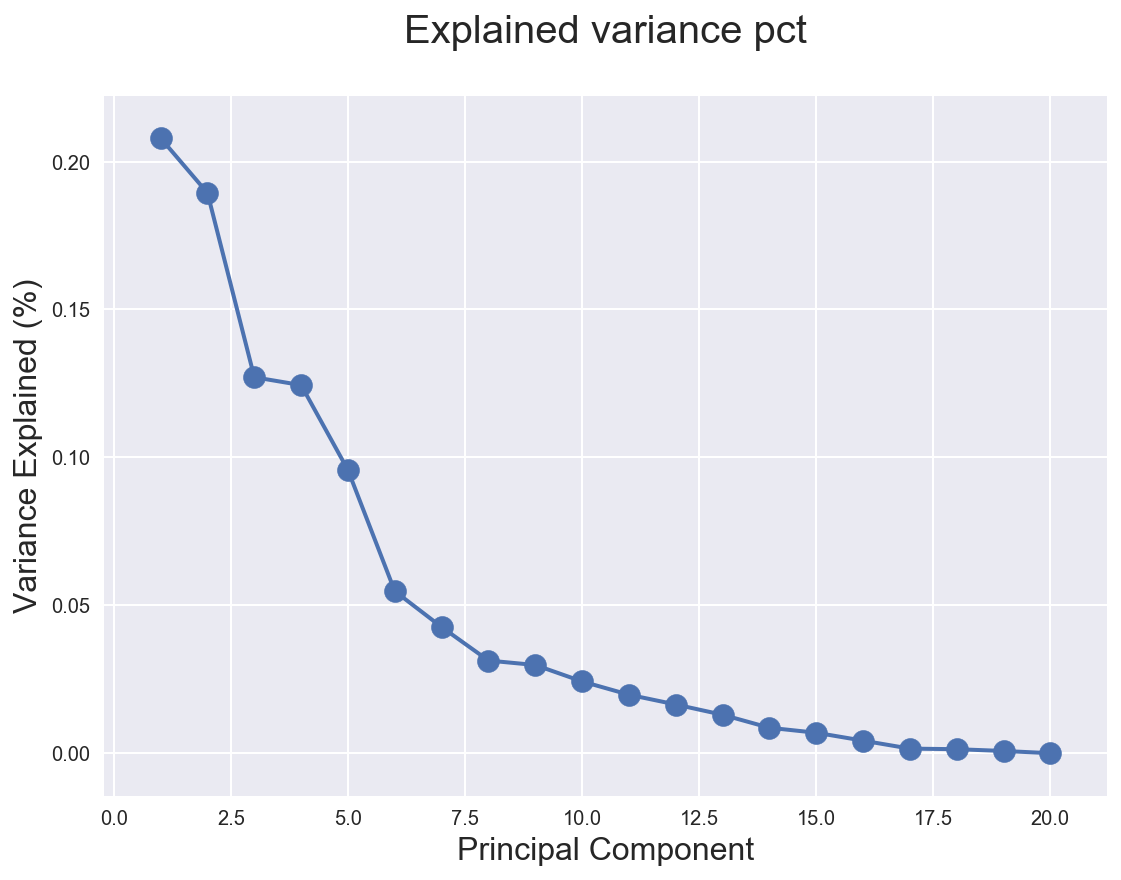

In [171]:
X16new = stints_16_clean.iloc[:,2:].values
SS = StandardScaler()
X16s = SS.fit_transform(X16new)

pca = PCA()
pca.fit(X16s)
components = pca.components_
pcs16 = pca.transform(X16s)
pcs16 = pd.DataFrame(pcs16, columns=['PC'+str(i+1) for i in range(len(components))])
pcs16 = pd.concat([stints_16_clean.iloc[:,:2].reset_index(drop=True), pcs16], axis=1)

exp_var_eigenvals = pca.explained_variance_
exp_var_pct = pca.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, len(exp_var_pct)+1), exp_var_pct, lw=2)
ax.scatter(range(1, len(exp_var_pct)+1), exp_var_pct, s=120)
ax.set_title('Explained variance pct\n', fontsize=20)
ax.set_xlabel('Principal Component', fontsize=16)
ax.set_ylabel('Variance Explained (%)', fontsize=16)
plt.show()

In [177]:
k_mean_opt = KMeans(n_clusters=2)
k_mean_opt.fit(pcs16.iloc[:,2:8])
labels_opt = k_mean_opt.labels_
print silhouette_score(X16mm, labels_opt)

X16pcs = pcs16.iloc[:,0:6]

X16pcs['clusters']=labels_opt
X16pcs

0.336717351639


year                      name       PC1       PC2       PC3       PC4  \
0   2016      Abu Dhabi Grand Prix -0.416133 -1.486960 -0.473318  0.114293   
1   2016     Australian Grand Prix -0.842221 -0.301240 -1.272409  0.827564   
2   2016       Austrian Grand Prix  0.459017 -3.066910 -0.236274 -2.176735   
3   2016     Azerbaijan Grand Prix -0.474075 -1.179843 -1.816155 -1.354350   
4   2016        Bahrain Grand Prix -0.663244 -1.401113 -1.670078  2.634390   
5   2016        Belgian Grand Prix -1.877488  1.148970 -0.710561  1.318125   
6   2016      Brazilian Grand Prix  6.803436  5.674910 -2.843324 -1.880526   
7   2016        British Grand Prix  2.249243  3.713005  0.119154  3.296338   
8   2016       Canadian Grand Prix  1.560170 -2.454528  1.407756 -1.578701   
9   2016        Chinese Grand Prix -1.999082 -0.614367 -1.848259  4.606469   
10  2016      Hungarian Grand Prix -0.612113 -2.028431 -0.705284 -0.825953   
11  2016        Italian Grand Prix -0.833988 -1.388277 -0.484401 -0.740427   
12  2016       Japanese Grand Prix -3.243144  3.677425  4.743361 -1.842162   
13  2016      Malaysian Grand Prix -3.046243  2.925181  3.186742 -0.349097   
14  2016        Mexican Grand Prix -1.769070  0.140038 -1.123136 -3.466476   
15  2016         Monaco Grand Prix  5.247150 -0.186558  3.027491  0.930309   
16  2016        Russian Grand Prix -0.516367 -0.752422 -2.268687 -2.623770   
17  2016      Singapore Grand Prix  3.816989 -4.894360  3.503260  1.403097   
18  2016        Spanish Grand Prix -2.379801  1.718923  0.242576  1.103643   
19  2016  United States Grand Prix -1.463037  0.756557 -0.778455  0.603969   

    clusters  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          1  
7          1  
8          0  
9          0  
10         0  
11         0  
12         0  
13         0  
14         0  
15         1  
16         0  
17         0  
18         0  
19         0

### Perform K-Means clustering on 2015 and 2016 dataset only (without PCA)

In [101]:
X1516 = stints_15_16_clean.drop(['year', 'name'], axis=1)
Y1516 = stints_15_16_clean[['year', 'name']]

In [149]:
MM = MinMaxScaler()
X1516mm = MM.fit_transform(X1516)

k_mean_opt = KMeans(n_clusters=9)
k_mean_opt.fit(X1516mm)
labels_opt = k_mean_opt.labels_
print silhouette_score(X1516mm, labels_opt)

X1516['clusters']=labels_opt

0.173570006955
